# Stoneburner, Kurt
- ## DSC 530 - Week 07

In [1]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
workingPath = os.getcwd().replace("coding", "ThinkStats2\\code")
sys.path.insert(1, workingPath)
os.chdir(workingPath)

In [2]:
# //*** Imports and Load Data
import nsfg
import thinkstats2
import thinkplot
import first
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

#resp = nsfg.ReadFemResp()
#preg = nsfg.ReadFemPreg()


- ## Chapter 7, Exercise 1

In [3]:
# //*** Get a pandas dataframe from the first library
live, firsts, others = first.MakeFrames()
# //*** Drop N/A values from agepreg and totalwgt_lb columns
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

**Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.**

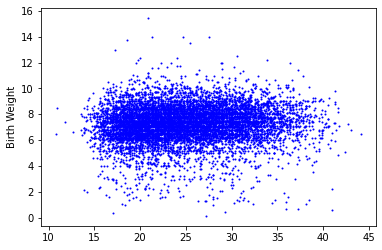

In [4]:
# //*** scatter plot with matplotlib
plt.scatter(live['agepreg'], live['totalwgt_lb'], 1, color='b')
#plt.title(f"Biased Distribution\nMean: {round(resp['numkdhh'][resp['numkdhh'] > 0].mean(),2)}")
#plt.xlabel('Top 30 Jobecodes by Frequency')
plt.ylabel('Birth Weight')
plt.show()


**Plot percentiles of birth weight versus mother’s age.**

In [5]:
# //********************************************
# //*** Reusable Functions Return from Week 03!
# //********************************************
# //*** Returns Series as a PMF
# //********************************************
def build_pmf(input_series):
    output_series = input_series.copy()
    total_values = input_series.sum()
    for value,freq in output_series.items():
        #print(f"{value} {freq} {total_values} {freq/total_values}")
        output_series.loc[value] = freq/total_values
    return output_series

# //*** Build a Cumulative Distribution Function from a Probability Mass Function
# //*** Returns a Series
def build_cdf(input_series):
    # //*** If input is not panda or pd series, try to convert it
    if not isinstance(input_series,pd.core.series.Series):
        input_series = pd.Series(input_series)
        
    # //*** If input is np.Array
    output_series = input_series.copy()
    cumulative_value = 0
    for value,freq in output_series.items():
        #print(f"{value} {freq} {cumulative_value} {freq + cumulative_value}")
        cumulative_value = freq + cumulative_value
        output_series.loc[value] = cumulative_value
    return output_series

# //*** Retrieve a percentile value from a CDF.
# //*** Returns index value closest to input parameter percentile.
def get_cdf_percentile(input_cdf,percentile):
    #print(f"{input_cdf}")
    #//*** Initialize output to first value
    output = input_cdf.index[0]
    
    #//*** Loop through all items till the value exceeds the percentile
    #//*** Return value from last loop
    for index,value in input_cdf.items():
        
        if value > percentile:
            return output
        else:
            output = index
            

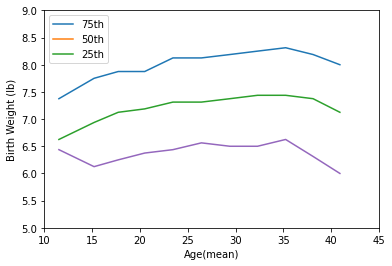

In [6]:
# //*** Build some abstraction to ease future use
# //*** The dependent Variable will be expressed as a mean of each binned value
dependent_variable = 'agepreg'
# //*** The independent variable will generate CDF percentiles for each binned_value
independent_variable = 'totalwgt_lb'

# //*** Get min and Max ages to set the limits of the group by bins
# //*** Converting to integers adds headroom (extra space) to the floor
# //*** Max + 1 gives a little extra room for Max
minVal = int(live[dependent_variable].min())
maxVal = int(live[dependent_variable].max())+1
bin_values = [.75,.50,.25]

# //*** Build binning parameters. Minimum value, Maximum Value, # of Bins
bins = np.arange(minVal, maxVal, len(bin_values))

#//*** Builds Index values for the bins
#//*** Seems very obtuse to me
indices = np.digitize(live[dependent_variable], bins)

#//*** Groups the dataframe into groups of binned indexes
groups = live.groupby(indices)   

# //*** Builds a list of the age mean for each binned values
mean_age_preg = [group.agepreg.mean() for i, group in groups]

# //*** Build a list CDFs for each binned value
CDFs = []

# //*** group is a tuple. Tuple[0] = index, tuple[1] = dataframe
for group in groups:
    #//*** CDF for each binned dataframe
    weight_counts = group[1][independent_variable].value_counts().sort_index()
    weight_counts_pmf = build_pmf(weight_counts)   
    weight_counts_cdf = build_cdf(weight_counts_pmf)   
    CDFs.append(weight_counts_cdf)

# //***********************************************************************************************************
# //*** Trim the last data point. The final values are converging for some reason. The book appears to trim
# //*** The last values off the groups using groups [1:-1]. That code does not run. Guessing it's due to a 
# //*** Syntax shift
# //***********************************************************************************************************
del CDFs[-1]
del mean_age_preg[-1]

labels = []
for x in bin_values:
    # //*** Build a list of percentiles to plot from each cdf using the percentile stored in bin_values
    weight_percentiles = [get_cdf_percentile(cdf,x) for cdf in CDFs]
    loop_label= f"{int(x*100)}th"
    plt.plot(mean_age_preg,weight_percentiles,1, label=loop_label)
    labels.append(loop_label)

plt.xlabel('Age(mean)')
plt.ylabel('Birth Weight (lb)')

plt.legend(labels)
plt.xlim(minVal,maxVal)
plt.ylim(5,9)
plt.show()
    
    


Note: My 25th Percentile values don't match the book solutions and I don't understand why. My binned values for the first bin seem high. I believe I matched the sample code in setting this up, so i'm perplexed and moving on.

**Compute Pearson’s and Spearman’s correlations.**

Pregnancy Age and Birth Weight Pearson's Correlation: 0.0688

This result is significant with p < .05: 5.72e-11

Pregnancy Age and Birth Weight Spearman's rank order correlation: 0.0946

This result is significant with p < .05: 2e-19


In [7]:
pearson_cor = scipy.stats.pearsonr(live['agepreg'],live['totalwgt_lb'])
spearman_rank = scipy.stats.spearmanr(live['agepreg'],live['totalwgt_lb'])

print(f"Pregnancy Age and Birth Weight Pearson's Correlation: {round(pearson_cor[0],4)}")
print(f"This result is significant with p < .05: {round(pearson_cor[1],13)}")
print(f"Pregnancy Age and Birth Weight Spearman's rank order correlation: {round(spearman_rank[0],4)}")
print(f"This result is significant with p < .05: {round(spearman_rank[1],21)}")

Pregnancy Age and Birth Weight Pearson's Correlation: 0.0688
This result is significant with p < .05: 5.72e-11
Pregnancy Age and Birth Weight Spearman's rank order correlation: 0.0946
This result is significant with p < .05: 2e-19


**How would you characterize the relationship between these variables:**

The scatterplot shows a loose relationship between age and birth weight. Pearson's Correlation Coefficient and Spearman's Rank Coefficient indciate there is significant linear correlation between a mother's age and newborn birth weight.

- ## Chapter 8, Exercise 1

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

### **Response:** ###

**Both the sampled $\bar{x}$ and sampled median produce unbiased estimators. As m (distribution iterations or sample_count) increase as the Standard Error $\sqrt{MSE}$ decreases.**

**Tests using a sample_count of 100,500,1000 & 5000, resulted in a lower standard error as sample_count increased.**

Example:

m=100  - Mean Standard Error: 0.10316337157692018   : Median Standard Error: 0.14121289281712673

m=500  - Mean Standard Error: 0.04606939525630564   : Median Standard Error: 0.057782011965663335

m=1000 - Mean Standard Error: 0.033070639131294315  : Median Standard Error: 0.042646823901880994

m=5000 - Mean Standard Error: 0.014120956172194495  : Median Standard Error: 0.017718853316370346


**Mean Squared Error Formula from Thinkstats**

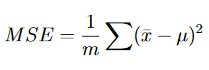

$$\text {$\bar{x}$ = Sample Mean} $$

$$\text {µ = distribution mean} $$

$$\text {m = number of tests to run} $$

In [8]:
# //*** Build a mean estimator

import random
# //***********************************************
# //*** Build a list comprised of a list of samples from a normal distribution.
# //*** n=sample size: Default = 7
# //*** m=totak number of samples
# //*** mean = Distribution mean
# //*** std_dev = Distribution standard deviation
# //***********************************************
# //*** Returns:
# //****    list of list samples.
# //****    list of means for each sample
# //****    list of medians for each sample
# //******************************************
def random_distribution_normal(n=7, m=1000,mean=0,std_dev=1):
    mu = mean
    sigma = std_dev

    means = []
    medians = []
    biased_variance = []
    unbiased_variance = []
    
    # //***
    for _ in range(m):
        #//*** Generate List of Samples
        xs = [random.gauss(mu, sigma) for _ in range(m)]
        #//*** Mean of Sample
        xbar = np.mean(xs)
        #//*** Median of Sample
        median = np.median(xs)

        
        means.append(xbar)
        medians.append(median)
        biased_variance.append( np.var(xs) )
        unbiased_variance.append( np.var(xs, ddof=1) )

    return means,medians,biased_variance,unbiased_variance

# //**************************************************************************************************************
# //*** It's a lot for a single line. This is the most pythonic thing i've written. I cribbed mightily from the 
# //*** book.
# //*** Starts with a loop iterator of the variance lists. 
# //*** Subtracts the actual variance from the biased variance for each instance, outputs each value into a list
# //*** Gets the mean of all values in the list
# //**************************************************************************************************************
def mean_error(input_samples,actual_value):
    return np.mean([ bias - actual_value for bias in input_samples ])

def mean_standard_error(input_samples,actual_value):
    difference_sum = 0
    for index in range(len(input_samples)):
        difference_sum = difference_sum  + (input_samples[index] - actual_value)**2  
       

    # //*** difference_sum = sum of mean - median squared for each sample
    # //*** Mean Square Error = (1/sample_count) * difference Sum
    # //*** Mean Standard Error = sqrt(Mean Square Error)
    return np.sqrt( (1/sample_count) * difference_sum )


for x in [100,500,1000,5000]:
    # //****************************
    sample_size = 7
    sample_count = x
    distribution_mean = 0
    distribution_std_dev = 1
    # //****************************

    # //*** Generate list of sample lists, with sample mean and median
    samples_means,samples_medians,samples_biased_var,samples_unbiased_var = random_distribution_normal(
        sample_size,sample_count,distribution_mean,distribution_std_dev)
    
    # //********************
    # //*** Determine MSE
    # //***************************************************************************
    # //*** Find the difference between:
    # //***            the Sample Mean and the distribution_mean
    # //***            and the sample median and the distribution_mean
    # //*** Square the difference
    # //*** Sum the result with the running total
    # //*** when done with loop Multiply the result by 1/sample_count (or 1/m)
    # //***************************************************************************    
    print(f"##########################################################################")
    difference_sum_mean = 0
    difference_sum_median = 0
    for index in range(sample_count):
        loop_mean = samples_means[index]
        loop_median = samples_medians[index]
        difference_sum_mean =   (loop_mean   - distribution_mean)**2 +  difference_sum_mean 
        difference_sum_median = (loop_median - distribution_mean)**2 +  difference_sum_median 

    # //*** difference_sum = sum of mean - median squared for each sample
    # //*** MSE = (1/sample_count) * difference Sum
    estimator_mean_MSE = (1/sample_count) * difference_sum_mean
    estimator_median_MSE = (1/sample_count) * difference_sum_median
    print(f"Sample Count (m): {x}")
    print(f"########################")
    print(f"Distribution Mean:          {distribution_mean}")
    print(f"Sampled Mean:               {np.mean(samples_means)}")
    print(f"Sampled Median:             {np.mean(samples_medians)}")
    print(f"Distribution Std Dev:       {distribution_std_dev}")
    print(f"Sampled Biased Std Dev:     {np.sqrt(np.mean(samples_biased_var))}")
    print(f"Sampled Uniased Std Dev:    {np.sqrt(np.mean(samples_unbiased_var))}")
    print(f"Sampled Biased Variance:    {np.mean(samples_biased_var)}")
    print(f"Sampled Uniased Variance:   {np.mean(samples_unbiased_var)}")
    print(f"Mean Standard Error:        { mean_standard_error( samples_means,  distribution_mean) }")
    print(f"Median Standard Error:      { mean_standard_error( samples_medians,distribution_mean)}")
    print(f"Mean Squared Error (MSE):   { np.sqrt(mean_standard_error( samples_means,  distribution_mean)) }")
    print(f"Median Squared Error (MSE): { np.sqrt(mean_standard_error( samples_medians,distribution_mean)) }")
    
    # //*** Find the Mean error between the unbiased and biased variance
    # //*** An individual error is the estimated variance - actual variance (standard deviation ** 2)
    # //*** Find the mean of all bias and unbiased sample variances

    actual_variance = distribution_std_dev ** 2
    
    print(f"Biased   Variance Error:    {mean_error(samples_biased_var,actual_variance)}")
    print(f"Unbiased Variance Error:    {mean_error(samples_unbiased_var,actual_variance)}")
    print(f"##########################################################################")


##########################################################################
Sample Count (m): 100
########################
Distribution Mean:          0
Sampled Mean:               0.0064389980463969735
Sampled Median:             0.006656920545463399
Distribution Std Dev:       1
Sampled Biased Std Dev:     0.9979980148990145
Sampled Uniased Std Dev:    1.003025744527136
Sampled Biased Variance:    0.9960000377423736
Sampled Uniased Variance:   1.0060606441842157
Mean Standard Error:        0.10316337157692018
Median Standard Error:      0.14121289281712673
Mean Squared Error (MSE):   0.32119055337434843
Median Squared Error (MSE): 0.37578303955490955
Biased   Variance Error:    -0.003999962257626489
Unbiased Variance Error:    0.006060644184215674
##########################################################################
##########################################################################
Sample Count (m): 500
########################
Distribution Mean:          0
Sampled Mean: 

- ## Chapter 8, Exercise 2

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

##### Estimator Formula's from ThinkStats#####

The mean of an exponential distribution L could be 1 / scale. We could substitute the $\bar{x}$ for scale and get L as an estimator.

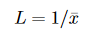 



Median estimation is using: Lm = log(2) / median
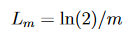


In [9]:
# //******************************************************************************
# //***** Functions **************************************************************
# //******************************************************************************

import math 

# //******************************************************************************
# //*** Build a list comprised of a list of samples from a normal distribution.
# //*** n=sample size: Default = 7
# //*** m=totak number of samples
# //*** low_val = Distribution minimum value
# //*** high_val = Distribution maximum value
# //******************************************
# //*** Returns:
# //****    list of list samples.
# //****    list of means for each sample
# //****    list of medians for each sample
# //******************************************************************************
def random_distribution_exponential(distribution_size=7, distribution_count=1000,scale=2):

    xs=[]
    means = []
    medians = []
    
    for _ in range(distribution_count):
        
        #//*** Generate List of Samples
        xs.append(np.random.exponential( 1 / scale, distribution_size))
        
        #//*** Mean estimation
        L = 1/np.mean(xs)
        #//*** Median estimation
        Lm = math.log(2) / np.median(xs)
        
        means.append(L)
        medians.append(Lm)

    return xs,means,medians


### Response: ###
I repeated the experiment with n values of 5,10,25,50,100,500,1000. Both the mean and median estimators appear to be unbiased since the error gets smaller (approaches zero) as the sample_size increases. Although it may be biased, depending on what the interpretation of "approaches zero" i mean. Even with 1000 samples the mean error is .003 and median is .008. I plotted the Mean CDF and Median CDF against all the distribution values at the end of this assignment. Viewed from that perspective, both estimators appear to be unbiased.

In [48]:
# //*** Convenience Function: Converts list to a CDF
# //*** Converts List to Series
# //*** Builds sorted Value counts
# //*** Builds PMf
# //*** Builds CDF
def list_to_cdf(input_list):
     return build_cdf(build_pmf(pd.Series(input_list).value_counts().sort_index()))

print(f"##########################################################################")
sample_sizes = [5,10,25,50,100,500,1000]
sample_collection = []
mean_standard_errors = []
median_standard_errors = []
for x in sample_sizes:
    # //******************************************
    # //*** Exponential Distribution Parameters
    # //******************************************
    sample_size = x
    sample_count = 1000
    sample_scale = 2
    # //***************************             
    samples_exp,samples_mean_exp,samples_median_exp = random_distribution_exponential(sample_size,sample_count,sample_scale)

    means_exp_cdf = list_to_cdf(samples_mean_exp)
    medians_exp_cdf = list_to_cdf(samples_median_exp)

    loop_sample_mean = np.mean(samples_mean_exp)
    loop_mean_std_error = mean_standard_error(samples_mean_exp,sample_scale)
    loop_median_std_error = mean_standard_error(samples_median_exp,sample_scale)
    low_mean_CI =  get_cdf_percentile(means_exp_cdf,.05 )
    high_mean_CI = get_cdf_percentile(means_exp_cdf,.95 )
    low_median_CI =  get_cdf_percentile(medians_exp_cdf,.05 )
    high_median_CI = get_cdf_percentile(medians_exp_cdf,.95 )

    print(f"Sample Size:\t\t\t{sample_size}")
    print(f"Sampled Mean:\t\t\t{np.mean(samples_mean_exp)}")
    print(f"\tstandard Error:\t\t{loop_mean_std_error}")
    print(f"\tMean 90% CI\t\t({ low_mean_CI },{high_mean_CI})")
    print(f"")
    print(f"Sampled Median:\t\t\t{np.mean(samples_median_exp)}")
    print(f"\tMedian standard Error:\t{loop_median_std_error}")
    print(f"\tMedian 90% CI\t\t({ low_median_CI },{high_median_CI})")
    print(f"##########################################################################")
    
    # //**** Roll all values into a list for post processing since this is starting to 
    # //**** get computationally expensive
    sample_collection.append({ 
        'sample_size' : x,
        'mean_standard_error' : loop_mean_std_error,
        'median_standard_error' : loop_median_std_error,
        'samples' : samples_exp,
        'sample_means' : samples_mean_exp,
        'sample_medians' : samples_median_exp
    })
    mean_standard_errors.append(loop_mean_std_error)
    median_standard_errors.append(loop_median_std_error)





##########################################################################
Sample Size:			5
Sampled Mean:			2.0052826293199355
	standard Error:		0.06679239798358583
	Mean 90% CI		(1.9613790156145894,2.036578966279681)

Sampled Median:			2.0544398320368984
	Median standard Error:	0.0928465087736757
	Median 90% CI		(1.9945197865280406,2.1336613941244473)
##########################################################################
Sample Size:			10
Sampled Mean:			1.9919614565905486
	standard Error:		0.04199181207341272
	Mean 90% CI		(1.9505606202454762,2.0130380240804424)

Sampled Median:			1.9663495299857632
	Median standard Error:	0.07954397002572146
	Median 90% CI		(1.8255366410467415,2.001002543273095)
##########################################################################
Sample Size:			25
Sampled Mean:			2.0007132614400964
	standard Error:		0.047969985957039794
	Mean 90% CI		(1.9580710336324574,2.0666110061822365)

Sampled Median:			1.9951876601989007
	Median standard Error:	0.074

### Response: ###
Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

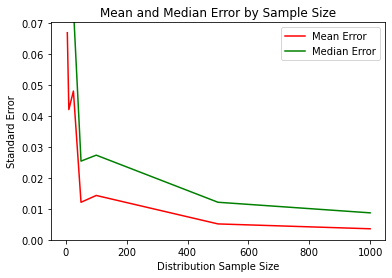

In [65]:
# //**** Legends automatically generate too many labels.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels

   
fig,ax = plt.subplots()
ax.plot(sample_sizes,mean_standard_errors,1, color='r', label='Mean Error')
ax.plot(sample_sizes,median_standard_errors,1, color='g', label='Median Error')
plt.title("Mean and Median Error by Sample Size")
plt.xlabel("Distribution Sample Size")
plt.ylabel("Standard Error")
plt.ylim(0,pd.Series(mean_standard_errors).max()*1.05)
# //**** DeDuplicate handles and labels
handles,labels = deduplicate_legend(ax)
plt.legend(handles,labels )
plt.show()




#### Extra: ####
Plot each distribution sample, 1000 distributions of each sample size: 5,10,25,50,100,500,1000. This demonstrates both mean and median estimators work reasonably well and give the similar results regardless of sample size. As the sample size increases the exponential distribution becomes more apparent.

The larger plots are quite expensive, 1000 distributions * 1000 sample_size = 1,000,000 points to plot.
This is also a good matplotlib exercise. Especially for generating a proper legend. With 1002 plots, the default legend had many additional values. My deduplicate_legend() function was instrumental in only drawing the unique values.

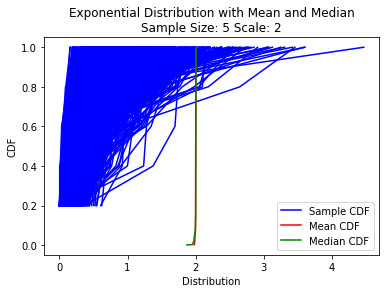

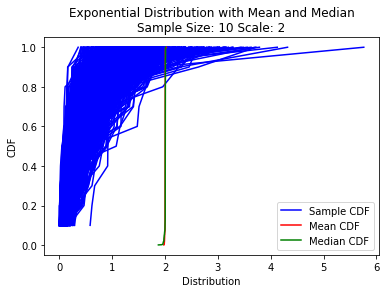

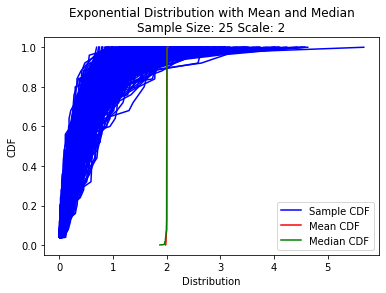

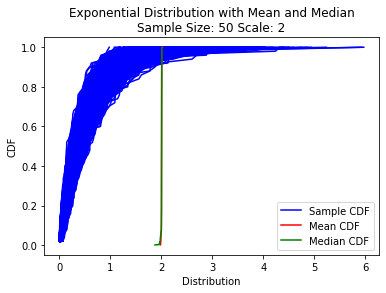

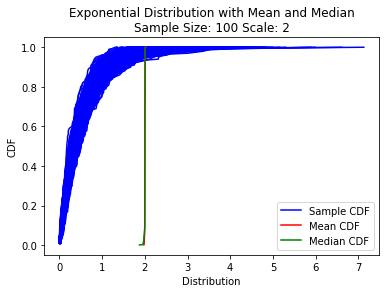

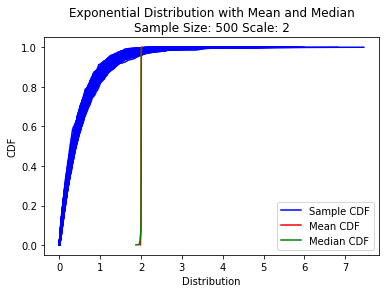

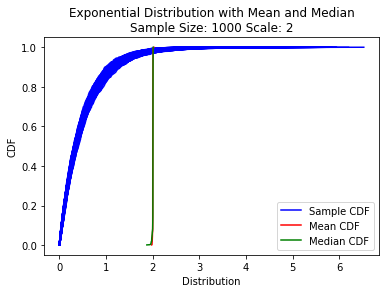

In [64]:
# //*** Plot Each distribution in sample_sizes: [5,10,25,50,100,500,1000]
# //*** Each plot contains 1000 random distribution plots for each sample size.
# //*** As Sample size increases, the exponential distribution shape is more apparent
for collection in sample_collection:
    fig,ax = plt.subplots()
    for sample in collection['samples']:
        loop_sample_exp = list_to_cdf(sample)
        ax.plot(loop_sample_exp.index.values, loop_sample_exp,1, color='b', label="Sample CDF")
    # //*** Matplot reference

    ax.plot(means_exp_cdf.index.values, means_exp_cdf,1, color='r', label="Mean CDF")
    ax.plot(medians_exp_cdf.index.values, medians_exp_cdf,1, color='g',label="Median CDF")
    plt.title(f"Exponential Distribution with Mean and Median\nSample Size: {collection['sample_size']} Scale: 2")

    plt.xlabel('Distribution')
    plt.ylabel('CDF')
    # //**** DeDuplicate handles and labels
    handles,labels = deduplicate_legend(ax)
    plt.legend(handles,labels )

    #plt.legend(labels)
    #plt.figure(figsize=(1,500))

    plt.show()